In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
#import PyCO2SYS as pyco2
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [4]:
#source_ids = [m for m in cat.df['source_id'].unique() if m not in ['CMCC-ESM2', 'KIOST-ESM', 'NorESM2-MM', 'NorESM2-LM']]
cat = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'so', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
# source_ids = source_ids = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
#                            'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
#                            'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
#                            'CESM2-WACCM-FV2', 'CESM2-FV2']
#cat = col.search(source_id = ['CMCC-ESM2'], variable_id= 'so', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd = cat.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found
CESM2-WACCM: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) fo

IndexError: index 16 is out of bounds for axis 0 with size 16

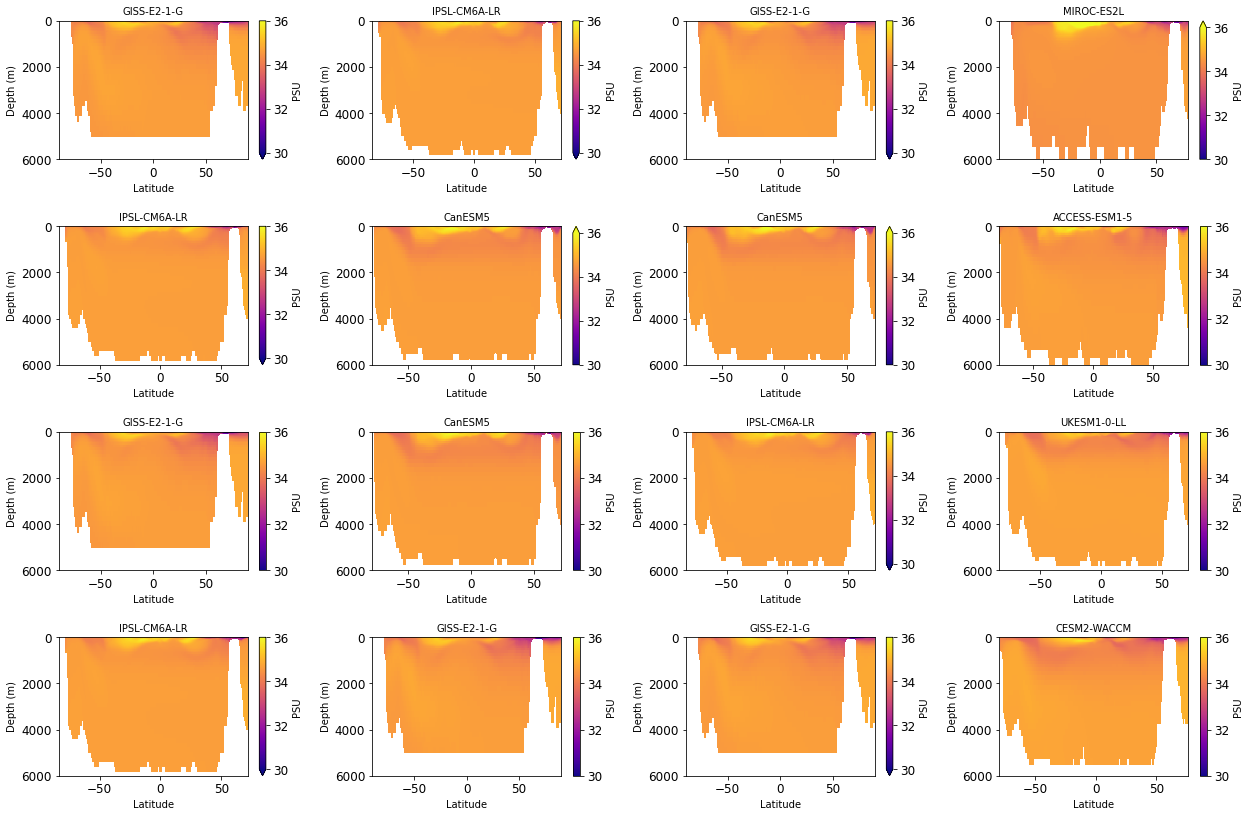

In [17]:
#You dont have to spell out all the axes, you can just keep them in an array
fig, axarr = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd.items():
#     print(ds)
    ax = axarr.flat[ax_idx]
    so_section = ds.so.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = so_section.plot(x='y', y='lev', yincrease=False, cmap = 'plasma', vmin=30, vmax=36, ax = ax, cbar_kwargs={'label':'PSU'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one



In [10]:
so_section

<xarray.DataArray 'so' (time: 6012, lev: 45, y: 289)>
dask.array<mean_agg-aggregate, shape=(6012, 45, 289), dtype=float32, chunksize=(8, 45, 289), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -78.39 -78.19 -77.98 -77.77 ... 71.33 71.43 71.51 71.57
  * lev      (lev) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
  * time     (time) object 5550-01-16 12:00:00 ... 6050-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Sea water salinity is the salt content of sea water, ofte...
    long_name:      Sea Water Salinity
    original_name:  vosaline
    standard_name:  sea_water_salinity
    units:          0.001